# 0. Importing the Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import ast
from collections import deque
from datetime import timedelta

# 1. Downloading the Datasets

In [2]:
product_catalog = pd.read_csv("original_data/product_catalog.csv")
product_category = pd.read_csv("original_data/product_category_map.csv")
transactions = pd.read_csv("original_data/transactions.csv")
test = pd.read_csv("original_data/test.csv")

## 1a. Analyzing & Preprocessing the Dataset

Investigating the entities, dtypes, numeric information etc.

### <center> - Product Catalog DataFrame - </center>

In [3]:
product_catalog.head()

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,NaN
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]


In [4]:
product_catalog.describe()

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5
count,32776.000000,32776.000000,32776.000000,32776.000000,32776.000000,32776.000000,32776.000000
mean,16387.500000,702.776574,6.451062,0.817946,440.280388,0.804735,74.689285
std,9461.760548,432.774074,2.744884,0.778284,132.566994,1.354669,57.621143
min,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,8193.750000,322.000000,4.000000,0.000000,453.000000,0.000000,17.000000
50%,16387.500000,648.000000,6.000000,1.000000,491.000000,0.000000,66.000000
75%,24581.250000,1073.000000,10.000000,1.000000,509.000000,3.000000,126.000000
max,32775.000000,1513.000000,10.000000,3.000000,538.000000,4.000000,190.000000


In [5]:
product_catalog.isna().sum()

product_id            0
manufacturer_id       0
attribute_1           0
attribute_2           0
attribute_3           0
attribute_4           0
attribute_5           0
categories         6788
dtype: int64

In [6]:
product_catalog.shape

(32776, 8)

In [7]:
product_catalog.dtypes

product_id          int64
manufacturer_id     int64
attribute_1         int64
attribute_2         int64
attribute_3         int64
attribute_4         int64
attribute_5         int64
categories         object
dtype: object

In [8]:
product_catalog["categories"].nunique()

12191

In [9]:
product_catalog["categories"] = product_catalog['categories'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip() != '' else [])

In [10]:
unique_categories = list()
for row in product_catalog["categories"]:
    for entity in row:
        if entity not in unique_categories:
            unique_categories.append(entity)

len(unique_categories)

3360

### <center> - Product Category - </center>

In [11]:
product_category.head()

,category_id,parent_category_id
0,0,75
1,1,1499
2,2,1082
3,3,3498
4,4,1623


In [12]:
product_category.describe()

,category_id,parent_category_id
count,4332.000000,4332.000000
mean,2147.165512,2204.845568
std,1241.039814,1222.376330
min,0.000000,8.000000
25%,1069.750000,1143.750000
50%,2146.500000,2284.000000
75%,3221.250000,3329.000000
max,4299.000000,3898.000000


In [13]:
product_category.isna().sum()

category_id           0
parent_category_id    0
dtype: int64

In [14]:
product_category.dtypes

category_id           int64
parent_category_id    int64
dtype: object

In [15]:
product_catalog

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,[]
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]
...,...,...,...,...,...,...,...,...
32771,12036,1383,10,0,503,0,101,"[3502, 1088, 2004, 691, 3422, 2308, 308, 3688,..."
32772,22709,567,4,2,491,3,66,"[3900, 3905, 3903, 3910, 1807, 274, 1467, 914]"
32773,32322,1385,10,1,500,0,37,"[2686, 2609, 725]"
32774,19118,1113,6,2,491,0,117,"[3900, 3910, 3903, 2473, 914, 274]"


### <center> - Transactions - </center>

In [16]:
transactions.head()

,customer_id,product_id,purchase_date,quantity
0,38769,3477,2020-06-01,1
1,42535,30474,2020-06-01,1
2,42535,15833,2020-06-01,1
3,42535,20131,2020-06-01,1
4,42535,4325,2020-06-01,1


In [17]:
# Filter out rows in transactions where customer_id is not in test
transactions = transactions[transactions['customer_id'].isin(test['customer_id'])].reset_index(drop=True)

transactions.head()

,customer_id,product_id,purchase_date,quantity
0,44176,20159,2020-06-01,1
1,39433,197,2020-06-01,1
2,39433,29370,2020-06-01,1
3,3172,9649,2020-06-01,1
4,13085,1509,2020-06-01,1


In [18]:
transactions['purchase_date'] = pd.to_datetime(transactions['purchase_date'])

In [19]:
transactions

,customer_id,product_id,purchase_date,quantity
0,44176,20159,2020-06-01,1
1,39433,197,2020-06-01,1
2,39433,29370,2020-06-01,1
3,3172,9649,2020-06-01,1
4,13085,1509,2020-06-01,1
...,...,...,...,...
273788,36347,17658,2021-01-31,2
273789,17894,21280,2021-01-31,3
273790,17894,31268,2021-01-31,1
273791,10900,18270,2021-01-31,1


In [20]:
transactions.describe()

,customer_id,product_id,purchase_date,quantity
count,273793.000000,273793.000000,273793,273793.000000
mean,23084.185122,16487.366960,2020-10-04 14:57:28.646240256,1.399251
min,0.000000,1.000000,2020-06-01 00:00:00,1.000000
25%,11757.000000,8343.000000,2020-08-04 00:00:00,1.000000
50%,23095.000000,16879.000000,2020-10-05 00:00:00,1.000000
75%,34720.000000,24528.000000,2020-12-06 00:00:00,1.000000
max,46130.000000,32775.000000,2021-01-31 00:00:00,100.000000
std,13245.821228,9433.718025,NaN,1.457499


In [21]:
transactions.isna().sum()

customer_id      0
product_id       0
purchase_date    0
quantity         0
dtype: int64

In [22]:
transactions.dtypes

customer_id               int64
product_id                int64
purchase_date    datetime64[ns]
quantity                  int64
dtype: object

In [23]:
transactions.nunique()

customer_id       7251
product_id       20623
purchase_date      245
quantity            32
dtype: int64

In [24]:
# Sort by customer_id, product_id, and purchase_date
transactions = transactions.sort_values(by=['customer_id', 'product_id', 'purchase_date'])

In [25]:
transactions.head()

,customer_id,product_id,purchase_date,quantity
99920,0,1505,2020-09-01,1
211259,0,6446,2020-12-11,1
251491,0,6446,2021-01-15,1
183150,0,9325,2020-11-20,1
67740,0,12468,2020-08-03,1


In [26]:
unique_customers = transactions['customer_id'].nunique()
print("Number of unique customers:", unique_customers)

Number of unique customers: 7251


In [27]:
clustered_products = pd.read_csv("updated_product_catalog.csv")
clustered_products.head()
clustered_products

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,categories_length,parent_categories,combined_categories,combined_cluster,cluster
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]",4,"[2832, 1178, 3898, 3898]","[3908, 3909, 2890, 2832, 855, 1178, 3898]",0,0
1,28640,1366,10,1,537,0,101,[],0,[],[],-1,154
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3...",13,"[1420, 3860, 600, 600, 3241, 3241, 3241, 600, ...","[163, 3270, 3912, 3561, 3913, 3595, 12, 3914, ...",-1,903
3,21399,1090,10,1,511,0,0,[3270],1,[1420],"[1420, 3270]",-1,903
4,8504,768,4,1,484,0,66,[2470],1,[2566],"[2470, 2566]",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32771,12036,1383,10,0,503,0,101,"[3502, 1088, 2004, 691, 3422, 2308, 308, 3688,...",11,"[3860, 458, 458, 458, 458, 322, 600, 600, 600,...","[1088, 322, 2308, 3688, 3241, 458, 12, 3502, 6...",395,395
32772,22709,567,4,2,491,3,66,"[3900, 3905, 3903, 3910, 1807, 274, 1467, 914]",8,"[3898, 3898, 3898, 3898, 1072, 2920, 2475, 3565]","[3905, 3910, 2920, 2475, 3565, 1807, 1072, 274...",0,0
32773,32322,1385,10,1,500,0,37,"[2686, 2609, 725]",3,"[2917, 1175, 725, 1735]","[2917, 1735, 2609, 725, 1175, 2686]",213,213
32774,19118,1113,6,2,491,0,117,"[3900, 3910, 3903, 2473, 914, 274]",6,"[3898, 3898, 3898, 2566, 3565, 2920]","[3910, 2566, 2920, 2473, 3565, 914, 274, 3898,...",0,0


In [28]:
merged_df = transactions.merge(clustered_products[['product_id', 'cluster']], on='product_id', how='left')

# Dropping the original product_id column and renaming cluster as cluster_id
merged_df = merged_df.rename(columns={'cluster': 'cluster_id'})

merged_df

,customer_id,product_id,purchase_date,quantity,cluster_id
0,0,1505,2020-09-01,1,139
1,0,6446,2020-12-11,1,47
2,0,6446,2021-01-15,1,47
3,0,9325,2020-11-20,1,558
4,0,12468,2020-08-03,1,106
...,...,...,...,...,...
273788,46130,29288,2020-11-28,1,377
273789,46130,29499,2020-11-28,1,277
273790,46130,29995,2020-12-10,1,496
273791,46130,30712,2020-08-19,1,106


In [29]:
# Sort by customer_id, product_id, and purchase_date
merged_df = merged_df.sort_values(by=['customer_id', 'cluster_id', 'purchase_date'])

In [30]:
merged_df.drop(columns=['product_id'], inplace=True)

In [31]:
merged_df['next_purchase_date'] = merged_df.groupby(['customer_id', 'cluster_id'])['purchase_date'].shift(-1)
# merged_df['next_purchase_date'] = merged_df.groupby(['customer_id', 'product_id'])['purchase_date'].shift(-1)
merged_df

,customer_id,purchase_date,quantity,cluster_id,next_purchase_date
12,0,2020-11-20,1,0,2020-12-11
13,0,2020-12-11,1,0,2021-01-25
6,0,2021-01-25,2,0,2021-01-25
14,0,2021-01-25,2,0,NaT
8,0,2020-06-05,1,1,2020-10-09
...,...,...,...,...,...
273765,46130,2020-12-10,1,737,NaT
273777,46130,2020-07-10,1,747,NaT
273754,46130,2020-06-03,1,874,2020-11-09
273755,46130,2020-11-09,2,874,2020-12-20


In [32]:
merged_df['re_purchased_week'] = ((1 + (merged_df['next_purchase_date'] - merged_df['purchase_date']).dt.days / 7) / merged_df['quantity']).fillna(0).astype(int)
merged_df.head()

,customer_id,purchase_date,quantity,cluster_id,next_purchase_date,re_purchased_week
12,0,2020-11-20,1,0,2020-12-11,4
13,0,2020-12-11,1,0,2021-01-25,7
6,0,2021-01-25,2,0,2021-01-25,0
14,0,2021-01-25,2,0,NaT,0
8,0,2020-06-05,1,1,2020-10-09,19


In [33]:
max_purchase_date = merged_df['purchase_date'].max()

# Calculating the cutoff date (4 weeks before max_purchase_date) to drop
cutoff_date = max_purchase_date - timedelta(weeks=3)

# Filter the last row of each customer-product pair
filtered_transactions = merged_df.sort_values(by=['customer_id', 'cluster_id', 'purchase_date'])
last_rows = filtered_transactions.drop_duplicates(subset=['customer_id', 'cluster_id'], keep='last')
filtered_transactions = filtered_transactions[~filtered_transactions.index.isin(last_rows.index)]

filtered_transactions

,customer_id,purchase_date,quantity,cluster_id,next_purchase_date,re_purchased_week
12,0,2020-11-20,1,0,2020-12-11,4
13,0,2020-12-11,1,0,2021-01-25,7
6,0,2021-01-25,2,0,2021-01-25,0
8,0,2020-06-05,1,1,2020-10-09,19
9,0,2020-10-09,1,1,2020-12-11,10
...,...,...,...,...,...,...
273778,46130,2020-11-09,5,526,2020-12-20,1
273780,46130,2020-10-23,1,583,2021-01-27,14
273764,46130,2020-08-19,1,737,2020-12-10,17
273754,46130,2020-06-03,1,874,2020-11-09,23


In [34]:
new_df = filtered_transactions.drop(columns=['purchase_date', 'next_purchase_date'])
new_df.head()

,customer_id,quantity,cluster_id,re_purchased_week
12,0,1,0,4
13,0,1,0,7
6,0,2,0,0
8,0,1,1,19
9,0,1,1,10


In [35]:
new_df[new_df["quantity"] == 1].re_purchased_week.unique()

array([ 4,  7, 19, 10,  6,  5,  2,  1, 13,  9,  8, 16, 30,  3, 23, 21, 11,
       15, 24, 22, 12, 17, 18, 32, 26, 33, 20, 31, 14, 29, 27, 28, 25, 35,
       34])

In [36]:
# Counting the occurrences of each re_purchased_week value
counts = new_df['re_purchased_week'].value_counts()

# Creating a new DataFrame to include weeks from 0 to 4
re_purchased_df = pd.DataFrame({'re_purchased_week': range(6), 'count': 0})
re_purchased_df.set_index('re_purchased_week', inplace=True)

# Updating the counts for weeks that exist in the data
for week, count in counts.items():
    if week in re_purchased_df.index:
        re_purchased_df.at[week, 'count'] = count

    elif week > 5:
        re_purchased_df.at[5, 'count'] += count

# Calculating the percentages
total_counts = re_purchased_df['count'].sum()
re_purchased_df['percentage'] = (re_purchased_df['count'] / total_counts * 100).round(2)

# Resetting index to make it more readable
final_df = re_purchased_df.reset_index()
final_df


,re_purchased_week,count,percentage
0,0,9820,7.33
1,1,37703,28.16
2,2,10931,8.16
3,3,9967,7.44
4,4,9331,6.97
5,5,56148,41.93


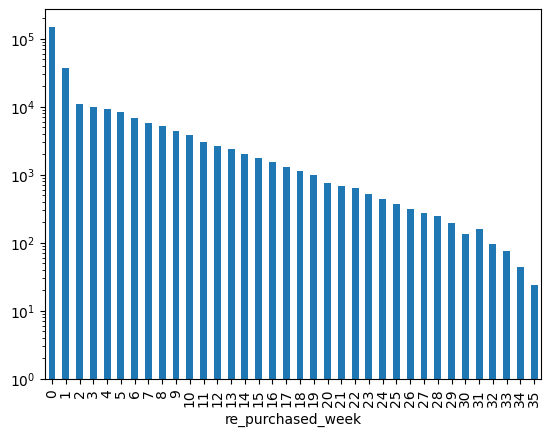

In [ ]:
new_df["re_purchased_week"].value_counts().sort_index().plot(kind="bar", log=True);

In [38]:
final_df.describe()

,re_purchased_week,count,percentage
count,6.000000,6.000000,6.000000
mean,2.500000,22316.666667,16.665000
std,1.870829,19941.114599,14.893127
min,0.000000,9331.000000,6.970000
25%,1.250000,9856.750000,7.357500
50%,2.500000,10449.000000,7.800000
75%,3.750000,31010.000000,23.160000
max,5.000000,56148.000000,41.930000


# <center> Merging the Datasets </center>

In [39]:
new_df

,customer_id,quantity,cluster_id,re_purchased_week
12,0,1,0,4
13,0,1,0,7
6,0,2,0,0
8,0,1,1,19
9,0,1,1,10
...,...,...,...,...
273778,46130,5,526,1
273780,46130,1,583,14
273764,46130,1,737,17
273754,46130,1,874,23


In [40]:
average_repurchased_week = new_df.groupby(['customer_id', 'cluster_id'])['re_purchased_week'].transform(lambda x: x.sum() / (len(x) - 1) if len(x) > 1 else 0)

# Adding a new column for average_repurchased_week
new_df['average_repurchased_week'] = average_repurchased_week

new_df

,customer_id,quantity,cluster_id,re_purchased_week,average_repurchased_week
12,0,1,0,4,5.5
13,0,1,0,7,5.5
6,0,2,0,0,5.5
8,0,1,1,19,29.0
9,0,1,1,10,29.0
...,...,...,...,...,...
273778,46130,5,526,1,0.0
273780,46130,1,583,14,0.0
273764,46130,1,737,17,0.0
273754,46130,1,874,23,26.0


In [41]:
new_df['total_transactions'] = new_df.groupby('customer_id')['customer_id'].transform('count')
new_df

,customer_id,quantity,cluster_id,re_purchased_week,average_repurchased_week,total_transactions
12,0,1,0,4,5.5,8
13,0,1,0,7,5.5,8
6,0,2,0,0,5.5,8
8,0,1,1,19,29.0,8
9,0,1,1,10,29.0,8
...,...,...,...,...,...,...
273778,46130,5,526,1,0.0,17
273780,46130,1,583,14,0.0,17
273764,46130,1,737,17,0.0,17
273754,46130,1,874,23,26.0,17


In [42]:
new_df['average_unit_per_transaction'] = new_df.groupby('customer_id')['quantity'].transform('mean')
new_df

,customer_id,quantity,cluster_id,re_purchased_week,average_repurchased_week,total_transactions,average_unit_per_transaction
12,0,1,0,4,5.5,8,1.125000
13,0,1,0,7,5.5,8,1.125000
6,0,2,0,0,5.5,8,1.125000
8,0,1,1,19,29.0,8,1.125000
9,0,1,1,10,29.0,8,1.125000
...,...,...,...,...,...,...,...
273778,46130,5,526,1,0.0,17,1.352941
273780,46130,1,583,14,0.0,17,1.352941
273764,46130,1,737,17,0.0,17,1.352941
273754,46130,1,874,23,26.0,17,1.352941


In [43]:
new_df['new_column'] = new_df["re_purchased_week"].apply(lambda x: 1 if x in [1,2,3,4] else 0)
new_df.head()

,customer_id,quantity,cluster_id,re_purchased_week,average_repurchased_week,total_transactions,average_unit_per_transaction,new_column
12,0,1,0,4,5.5,8,1.125,1
13,0,1,0,7,5.5,8,1.125,0
6,0,2,0,0,5.5,8,1.125,0
8,0,1,1,19,29.0,8,1.125,0
9,0,1,1,10,29.0,8,1.125,0


In [44]:
cluster_means = pd.read_csv("cluster_means.csv")

In [45]:
# Merge new_df with cluster_means on the cluster_id column
new_df = new_df.merge(cluster_means, on='cluster_id', how='left')

# Display the updated new_df
new_df.head()

,customer_id,quantity,cluster_id,re_purchased_week,average_repurchased_week,total_transactions,average_unit_per_transaction,new_column,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5
0,0,1,0,4,5.5,8,1.125,1,6.595241,0.728292,420.984556,0.980094,79.027914
1,0,1,0,7,5.5,8,1.125,0,6.595241,0.728292,420.984556,0.980094,79.027914
2,0,2,0,0,5.5,8,1.125,0,6.595241,0.728292,420.984556,0.980094,79.027914
3,0,1,1,19,29.0,8,1.125,0,4.655738,0.901639,387.213115,1.032787,92.360656
4,0,1,1,10,29.0,8,1.125,0,4.655738,0.901639,387.213115,1.032787,92.360656


In [46]:
new_df.to_csv("new_df.csv", index=False)

In [47]:
from catboost import CatBoostRegressor, CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import root_mean_squared_error, accuracy_score

In [48]:
# Specify categorical features
# categorical_features = ['cluster_id']

# Separate features (X) and target (y)
X = new_df.drop(columns=['new_column', 're_purchased_week', 'customer_id', 'quantity', 'cluster_id'])
y = new_df['new_column']

# Initialize KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Store metrics for each fold
fold_metrics = []

for train_index, val_index in skf.split(X, y):
    # Split data into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Create CatBoost Pools
    train_pool = Pool(data=X_train, label=y_train)
    val_pool = Pool(data=X_val, label=y_val)
    # train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features)
    # val_pool = Pool(data=X_val, label=y_val, cat_features=categorical_features)
    
    # Initialize and train CatBoostClassifier
    boostmodel = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, loss_function='Logloss', verbose=0)
    boostmodel.fit(train_pool)
    
    # Predict on validation set
    y_pred = boostmodel.predict(val_pool)
    
    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_val, y_pred)
    fold_metrics.append(accuracy)

# Output average accuracy across all folds
print(f"Average Accuracy: {sum(fold_metrics) / len(fold_metrics):.4f}")

Average Accuracy: 0.7095


In [49]:
# Specify categorical features
# categorical_features = ['cluster_id']

deneme = new_df[(new_df["re_purchased_week"] > 0) & (new_df["re_purchased_week"] < 5)]
# Separate features (X) and target (y)
X = deneme.drop(columns=['new_column', 're_purchased_week', 'customer_id', 'quantity', 'cluster_id'])
y = deneme['re_purchased_week']

# Initialize KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Store metrics for each fold
fold_metrics = []

for train_index, val_index in skf.split(X, y):
    # Split data into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Create CatBoost Pools
    train_pool = Pool(data=X_train, label=y_train)
    val_pool = Pool(data=X_val, label=y_val)
    # train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features)
    # val_pool = Pool(data=X_val, label=y_val, cat_features=categorical_features)

    # Initialize and train CatBoostClassifier
    subboostmodel = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, loss_function='MultiClass', verbose=0)
    subboostmodel.fit(train_pool)

    # Predict on validation set
    y_pred = subboostmodel.predict(val_pool)

    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_val, y_pred)
    fold_metrics.append(accuracy)

# Output average accuracy across all folds
print(f"Average Accuracy: {sum(fold_metrics) / len(fold_metrics):.4f}")

Average Accuracy: 0.5686


In [50]:
# Load the test data
test_data = pd.read_csv("original_data/test.csv")

# Add the cluster_id column for the corresponding products in the row
test_data = test_data.merge(clustered_products[['product_id', 'cluster']], on='product_id', how='left')
test_data = test_data.rename(columns={'cluster': 'cluster_id'})

display(test_data)

,id,customer_id,product_id,prediction,cluster_id
0,0,0,20664,NaN,1
1,1,0,28231,NaN,0
2,2,13,2690,NaN,0
3,3,15,1299,NaN,0
4,4,15,20968,NaN,573
...,...,...,...,...,...
9995,9995,46118,20106,NaN,0
9996,9996,46124,19677,NaN,784
9997,9997,46125,12878,NaN,0
9998,9998,46127,7963,NaN,157


In [51]:

# Add average_repurchased_week for the same customer - cluster pair
test_data = test_data.merge(new_df[['customer_id', 'cluster_id', 'average_repurchased_week']], on=['customer_id', 'cluster_id'], how='left')

test_data.drop_duplicates(subset=['customer_id', 'product_id'], keep='first', inplace=True)

# # Add average_unit_per_transaction corresponding to customer_id
test_data = test_data.merge(new_df[['customer_id', 'average_unit_per_transaction']], on='customer_id', how='left')

test_data.drop_duplicates(subset=['customer_id', 'product_id'], keep='first', inplace=True)

# Add total_transactions corresponding to customer_id
test_data = test_data.merge(new_df[['customer_id', 'total_transactions']], on='customer_id', how='left')

test_data.drop_duplicates(subset=['customer_id', 'product_id'], keep='first', inplace=True)

# Merge new_df with cluster_means on the cluster_id column
test_data = test_data.merge(cluster_means, on='cluster_id', how='left')

# Display the updated new_df
new_df.head()

display(test_data)

,id,customer_id,product_id,prediction,cluster_id,average_repurchased_week,average_unit_per_transaction,total_transactions,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5
0,0,0,20664,NaN,1,29.000000,1.125000,8,4.655738,0.901639,387.213115,1.032787,92.360656
1,1,0,28231,NaN,0,5.500000,1.125000,8,6.595241,0.728292,420.984556,0.980094,79.027914
2,2,13,2690,NaN,0,3.363636,1.259259,27,6.595241,0.728292,420.984556,0.980094,79.027914
3,3,15,1299,NaN,0,2.133333,1.370370,27,6.595241,0.728292,420.984556,0.980094,79.027914
4,4,15,20968,NaN,573,8.500000,1.370370,27,4.000000,1.000000,433.764706,0.529412,147.352941
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,46118,20106,NaN,0,4.285714,1.695652,23,6.595241,0.728292,420.984556,0.980094,79.027914
9996,9996,46124,19677,NaN,784,7.000000,1.000000,21,4.000000,0.666667,491.000000,1.600000,89.133333
9997,9997,46125,12878,NaN,0,12.333333,1.125000,8,6.595241,0.728292,420.984556,0.980094,79.027914
9998,9998,46127,7963,NaN,157,5.333333,1.545455,11,5.552239,0.850746,384.029851,1.208955,94.656716


In [52]:
# Prepare the test features
X_test = test_data.drop(columns=['id', 'customer_id', 'product_id', 'prediction', 'cluster_id'])

# Create CatBoost Pool for test data
test_pool = Pool(data=X_test)

# Make predictions on the test data
test_predictions = boostmodel.predict(test_pool)

# Add predictions to the test data
test_data['prediction'] = test_predictions

# Save the test data with predictions to a new CSV file
test_data.to_csv("test_with_predictions.csv", index=False)

# Display the first few rows of the test data with predictions
test_data.head()

,id,customer_id,product_id,prediction,cluster_id,average_repurchased_week,average_unit_per_transaction,total_transactions,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5
0,0,0,20664,0,1,29.000000,1.125000,8,4.655738,0.901639,387.213115,1.032787,92.360656
1,1,0,28231,1,0,5.500000,1.125000,8,6.595241,0.728292,420.984556,0.980094,79.027914
2,2,13,2690,1,0,3.363636,1.259259,27,6.595241,0.728292,420.984556,0.980094,79.027914
3,3,15,1299,1,0,2.133333,1.370370,27,6.595241,0.728292,420.984556,0.980094,79.027914
4,4,15,20968,0,573,8.500000,1.370370,27,4.000000,1.000000,433.764706,0.529412,147.352941


In [53]:
# Remove rows where prediction is 0 or cluster_id is -1
filtered_test_df = test_data[(test_data['prediction'] != 0) & (test_data['cluster_id'] != -1)]
filtered_test_df.head()

,id,customer_id,product_id,prediction,cluster_id,average_repurchased_week,average_unit_per_transaction,total_transactions,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5
1,1,0,28231,1,0,5.500000,1.125000,8,6.595241,0.728292,420.984556,0.980094,79.027914
2,2,13,2690,1,0,3.363636,1.259259,27,6.595241,0.728292,420.984556,0.980094,79.027914
3,3,15,1299,1,0,2.133333,1.370370,27,6.595241,0.728292,420.984556,0.980094,79.027914
5,5,20,8272,1,0,3.875000,1.111111,9,6.595241,0.728292,420.984556,0.980094,79.027914
15,15,79,21856,1,0,5.000000,1.428571,7,6.595241,0.728292,420.984556,0.980094,79.027914


In [54]:
# Prepare the test features for subboostmodel
X_filtered_test = filtered_test_df.drop(columns=['id', 'customer_id', 'prediction', 'cluster_id'])

# Create CatBoost Pool for filtered test data
filtered_test_pool = Pool(data=X_filtered_test)

# Make predictions on the filtered test data using subboostmodel
filtered_test_predictions = subboostmodel.predict(filtered_test_pool)

# Add predictions to the filtered test data
filtered_test_df['subboostmodel_prediction'] = filtered_test_predictions

# Display the first few rows of the filtered test data with predictions
filtered_test_df.head()

/var/folders/s8/dtkxhqdx0d1c4g1_95ztsf0c0000gn/T/ipykernel_69139/2452466595.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_df['subboostmodel_prediction'] = filtered_test_predictions


,id,customer_id,product_id,prediction,cluster_id,average_repurchased_week,average_unit_per_transaction,total_transactions,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,subboostmodel_prediction
1,1,0,28231,1,0,5.500000,1.125000,8,6.595241,0.728292,420.984556,0.980094,79.027914,1
2,2,13,2690,1,0,3.363636,1.259259,27,6.595241,0.728292,420.984556,0.980094,79.027914,1
3,3,15,1299,1,0,2.133333,1.370370,27,6.595241,0.728292,420.984556,0.980094,79.027914,1
5,5,20,8272,1,0,3.875000,1.111111,9,6.595241,0.728292,420.984556,0.980094,79.027914,1
15,15,79,21856,1,0,5.000000,1.428571,7,6.595241,0.728292,420.984556,0.980094,79.027914,1


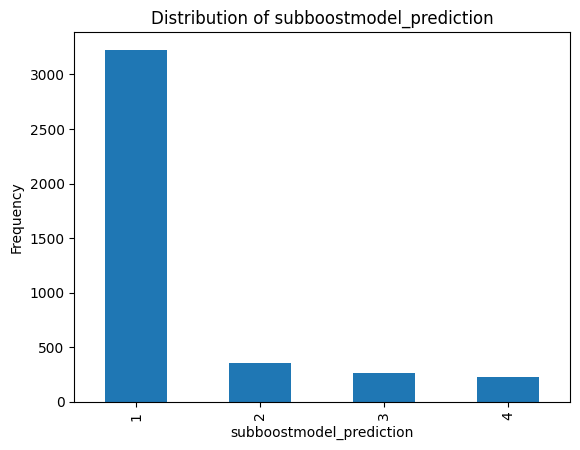

In [55]:
# Get the distribution of subboostmodel_prediction
subboostmodel_prediction_distribution = filtered_test_df['subboostmodel_prediction'].value_counts()

# Plot the distribution
subboostmodel_prediction_distribution.plot(kind='bar', title='Distribution of subboostmodel_prediction')
plt.xlabel('subboostmodel_prediction')
plt.ylabel('Frequency')
plt.show()

In [56]:
filtered_test_df

,id,customer_id,product_id,prediction,cluster_id,average_repurchased_week,average_unit_per_transaction,total_transactions,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,subboostmodel_prediction
1,1,0,28231,1,0,5.500000,1.125000,8,6.595241,0.728292,420.984556,0.980094,79.027914,1
2,2,13,2690,1,0,3.363636,1.259259,27,6.595241,0.728292,420.984556,0.980094,79.027914,1
3,3,15,1299,1,0,2.133333,1.370370,27,6.595241,0.728292,420.984556,0.980094,79.027914,1
5,5,20,8272,1,0,3.875000,1.111111,9,6.595241,0.728292,420.984556,0.980094,79.027914,1
15,15,79,21856,1,0,5.000000,1.428571,7,6.595241,0.728292,420.984556,0.980094,79.027914,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,9991,46096,6923,1,0,1.785714,1.727273,22,6.595241,0.728292,420.984556,0.980094,79.027914,1
9992,9992,46103,31715,1,0,2.222222,1.555556,18,6.595241,0.728292,420.984556,0.980094,79.027914,1
9994,9994,46117,8847,1,0,5.333333,1.000000,10,6.595241,0.728292,420.984556,0.980094,79.027914,1
9995,9995,46118,20106,1,0,4.285714,1.695652,23,6.595241,0.728292,420.984556,0.980094,79.027914,1


In [57]:
yetim = test_data[~((test_data['prediction'] != 0) & (test_data['cluster_id'] != -1))]
yetim['prediction'] = 0
yetim['subboostmodel_prediction'] = 0
yetim

/var/folders/s8/dtkxhqdx0d1c4g1_95ztsf0c0000gn/T/ipykernel_69139/2866027369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yetim['prediction'] = 0
/var/folders/s8/dtkxhqdx0d1c4g1_95ztsf0c0000gn/T/ipykernel_69139/2866027369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yetim['subboostmodel_prediction'] = 0


,id,customer_id,product_id,prediction,cluster_id,average_repurchased_week,average_unit_per_transaction,total_transactions,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,subboostmodel_prediction
0,0,0,20664,0,1,29.000000,1.125000,8,4.655738,0.901639,387.213115,1.032787,92.360656,0
4,4,15,20968,0,573,8.500000,1.370370,27,4.000000,1.000000,433.764706,0.529412,147.352941,0
6,6,24,11340,0,199,11.000000,1.534884,43,10.000000,0.923077,504.076923,0.000000,17.000000,0
7,7,34,21146,0,813,12.000000,1.000000,16,7.900000,0.600000,261.300000,0.900000,81.500000,0
8,8,34,31244,0,547,22.000000,1.000000,16,4.000000,0.000000,491.000000,0.000000,66.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,9990,46095,29657,0,9,0.666667,2.809524,21,5.536585,0.658537,342.073171,0.585366,76.756098,0
9993,9993,46107,11349,0,56,30.000000,1.133333,15,5.431818,0.272727,262.431818,1.863636,112.931818,0
9996,9996,46124,19677,0,784,7.000000,1.000000,21,4.000000,0.666667,491.000000,1.600000,89.133333,0
9997,9997,46125,12878,0,0,12.333333,1.125000,8,6.595241,0.728292,420.984556,0.980094,79.027914,0


In [58]:
yetim["prediction"] = 0
yetim

/var/folders/s8/dtkxhqdx0d1c4g1_95ztsf0c0000gn/T/ipykernel_69139/2408765543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yetim["prediction"] = 0


,id,customer_id,product_id,prediction,cluster_id,average_repurchased_week,average_unit_per_transaction,total_transactions,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,subboostmodel_prediction
0,0,0,20664,0,1,29.000000,1.125000,8,4.655738,0.901639,387.213115,1.032787,92.360656,0
4,4,15,20968,0,573,8.500000,1.370370,27,4.000000,1.000000,433.764706,0.529412,147.352941,0
6,6,24,11340,0,199,11.000000,1.534884,43,10.000000,0.923077,504.076923,0.000000,17.000000,0
7,7,34,21146,0,813,12.000000,1.000000,16,7.900000,0.600000,261.300000,0.900000,81.500000,0
8,8,34,31244,0,547,22.000000,1.000000,16,4.000000,0.000000,491.000000,0.000000,66.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,9990,46095,29657,0,9,0.666667,2.809524,21,5.536585,0.658537,342.073171,0.585366,76.756098,0
9993,9993,46107,11349,0,56,30.000000,1.133333,15,5.431818,0.272727,262.431818,1.863636,112.931818,0
9996,9996,46124,19677,0,784,7.000000,1.000000,21,4.000000,0.666667,491.000000,1.600000,89.133333,0
9997,9997,46125,12878,0,0,12.333333,1.125000,8,6.595241,0.728292,420.984556,0.980094,79.027914,0


In [59]:
combined_df = pd.concat([yetim, filtered_test_df], ignore_index=True)
combined_df

,id,customer_id,product_id,prediction,cluster_id,average_repurchased_week,average_unit_per_transaction,total_transactions,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,subboostmodel_prediction
0,0,0,20664,0,1,29.000000,1.125000,8,4.655738,0.901639,387.213115,1.032787,92.360656,0
1,4,15,20968,0,573,8.500000,1.370370,27,4.000000,1.000000,433.764706,0.529412,147.352941,0
2,6,24,11340,0,199,11.000000,1.534884,43,10.000000,0.923077,504.076923,0.000000,17.000000,0
3,7,34,21146,0,813,12.000000,1.000000,16,7.900000,0.600000,261.300000,0.900000,81.500000,0
4,8,34,31244,0,547,22.000000,1.000000,16,4.000000,0.000000,491.000000,0.000000,66.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9991,46096,6923,1,0,1.785714,1.727273,22,6.595241,0.728292,420.984556,0.980094,79.027914,1
9996,9992,46103,31715,1,0,2.222222,1.555556,18,6.595241,0.728292,420.984556,0.980094,79.027914,1
9997,9994,46117,8847,1,0,5.333333,1.000000,10,6.595241,0.728292,420.984556,0.980094,79.027914,1
9998,9995,46118,20106,1,0,4.285714,1.695652,23,6.595241,0.728292,420.984556,0.980094,79.027914,1


In [60]:
# Sort the combined_df by id
combined_df = combined_df.sort_values(by='id')

# Drop columns other than id, customer_id, product_id, subboostmodel_prediction
combined_df = combined_df[['id', 'customer_id', 'product_id', 'subboostmodel_prediction']]

# Rename the subboostmodel_prediction column to prediction
combined_df = combined_df.rename(columns={'subboostmodel_prediction': 'prediction'})

combined_df.head()

,id,customer_id,product_id,prediction
0,0,0,20664,0
5930,1,0,28231,1
5931,2,13,2690,1
5932,3,15,1299,1
1,4,15,20968,0


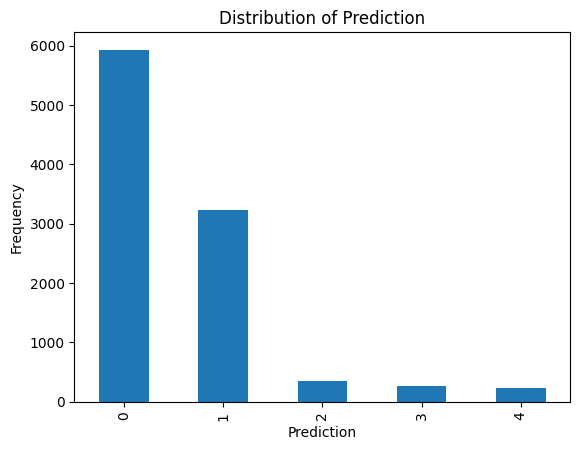

In [61]:
# Get the distribution of the prediction column
prediction_distribution = combined_df['prediction'].value_counts()

# Plot the distribution
prediction_distribution.plot(kind='bar', title='Distribution of Prediction')
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.show()

In [62]:
combined_df.to_csv("combined_df.csv", index=False)